In [30]:
#read in nick data

import pandas as pd
from dotenv import load_dotenv
import hvplot.pandas
import os
import numpy as np
from pathlib import Path
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline




In [31]:
load_dotenv()

True

In [32]:
#Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")

# Create the Alpaca API object
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [33]:
# Set the tickers
tickers = ["DKNG","FUBO", "NKE", "WWE"]

# Format dates 
start_date = pd.Timestamp('2019-03-25', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-26', tz='America/New_York').isoformat()

timeframe = "1D"

# Get current closing prices for nick's portfolio
nick_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000,
).df

# Preview DataFrame
nick_portfolio.head()


DKNG                       FUBO                 \
                          open high low close volume open high low close   
time                                                                       
2019-03-25 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN   
2019-03-26 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN   
2019-03-27 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN   
2019-03-28 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN   
2019-03-29 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN   

                                    NKE                                   WWE  \
                          volume   open   high    low  close    volume   open   
time                                                                            
2019-03-25 00:00:00-04:00    NaN  81.48  83.22  80.89  82.32  14435279  86.99   
2019-03-26 00:00:00-04:00    NaN  83.63  84.09  82.91  83.36   8695522  89.79   
2019-03-27 00:00:00-04:00    NaN  83.69  83.80  82.04  83.08   5684846  87.82   
2019-03-28 00:00:00-04:00    NaN  83.93  84.72  83.70  84.03   5157263  84.40   
2019-03-29 00:00:00-04:00    NaN  84.60  84.85  83.86  84.21   4625963  86.10   

                                                              
                              high      low   close   volume  
time                                                          
2019-03-25 00:00:00-04:00  87.3400  85.7701  87.230   939388  
2019-03-26 00:00:00-04:00  91.1000  87.0300  88.290  1100609  
2019-03-27 00:00:00-04:00  88.3128  83.8600  84.870   773043  
2019-03-28 00:00:00-04:00  86.1600  83.9000  85.895  2275979  
2019-03-29 00:00:00-04:00  86.8900  85.1850  86.780  1045767

In [34]:
nick_portfolio_prices = pd.DataFrame()
nick_portfolio_prices['DKNG'] = nick_portfolio['DKNG']['close']
nick_portfolio_prices['NKE'] = nick_portfolio['NKE']['close']
nick_portfolio_prices['WWE'] = nick_portfolio['WWE']['close']
nick_portfolio_prices['FUBO'] = nick_portfolio['FUBO']['close']
nick_portfolio_prices.index = nick_portfolio_prices.index.date
nick_portfolio_prices.head(10)

,DKNG,NKE,WWE,FUBO
2019-03-25,NaN,82.32,87.230,NaN
2019-03-26,NaN,83.36,88.290,NaN
2019-03-27,NaN,83.08,84.870,NaN
2019-03-28,NaN,84.03,85.895,NaN
2019-03-29,NaN,84.21,86.780,NaN
2019-04-01,NaN,85.22,87.170,NaN
2019-04-02,NaN,84.37,87.440,NaN
2019-04-03,NaN,84.46,89.090,NaN
2019-04-04,NaN,85.29,89.730,NaN
2019-04-05,NaN,85.38,89.170,NaN


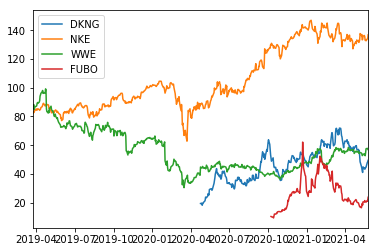

In [35]:
nick_portfolio_prices.plot()

In [36]:
nick_portfolio_prices.to_csv('nick_portfolio.csv')

